# Predict Samsun House Prices from emlakjet(https://www.emlakjet.com/) by Web Scraping and Modelling Regression ML and Deep Learning

<div style="text-align:center">
    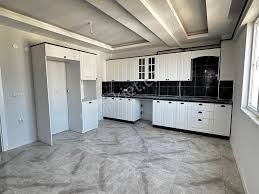
</div>

In [101]:
#pip install selenium

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

from termcolor import colored

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

## Web Scrapping with Selenium from Emlakjet Samsun House Infos

In [103]:
def scrap(feature, list_name):
    element = driver.find_element(By.XPATH, f'//*[contains(text(), "{feature}")]/following-sibling::div')   
    text = driver.execute_script("return arguments[0].innerText;", element)
    list_name.append(text)

In [ ]:
driver = webdriver.Chrome()
url = "https://www.emlakjet.com/kiralik-konut/samsun/"

time.sleep(10)



price = []
title = []
net_m2 = []
room_count = []
floor = []
total_floor = []
heating = []
property_type = []
bathroom = []
balcony_count = []
living_room_m2 = []
brut_m2 = []
age = []
due_monthly = []
in_site = []



pagecount = 1
while pagecount < 23:
    new_url = url + "/" + str(pagecount)
    driver.get(new_url)
    
    links = driver.find_elements(By.CSS_SELECTOR,'div._3qUI9q > a')
    link_urls = [link.get_attribute('href') for link in links if link.get_attribute('href') is not None]

    for link in link_urls:
    
        driver.get(link)
        time.sleep(10)
        
        price.append(driver.find_element(By.CSS_SELECTOR, 'div.R-RKDB').text)
        title.append(driver.find_element(By.CSS_SELECTOR,'h1').text)
        net_m2.append(driver.find_element(By.XPATH,'//*[@id="bilgiler"]/div/div[2]/div/div[1]/div[1]/div[4]/div[2]').text)
        room_count.append(driver.find_element(By.XPATH,'//*[@id="bilgiler"]/div/div[2]/div/div[1]/div[1]/div[5]/div[2]').text)
        floor.append(driver.find_element(By.XPATH,'//*[@id="bilgiler"]/div/div[2]/div/div[1]/div[1]/div[6]/div[2]').text)
        total_floor.append(driver.find_element(By.XPATH,'//*[@id="bilgiler"]/div/div[2]/div/div[1]/div[2]/div[6]/div[2]').text)
        heating.append(driver.find_element(By.XPATH,'//*[@id="bilgiler"]/div/div[2]/div/div[1]/div[1]/div[7]/div[2]').text)
        brut_m2.append(driver.find_element(By.XPATH,'//*[@id="bilgiler"]/div/div[2]/div/div[1]/div[2]/div[4]/div[2]').text)
        age.append(driver.find_element(By.XPATH,'//*[@id="bilgiler"]/div/div[2]/div/div[1]/div[2]/div[5]/div[2]').text)
        scrap("Eşya Durumu",property_type)
        scrap("Balkon Sayısı",balcony_count)
        scrap("Salon Metrekare",living_room_m2)
        scrap("Aidat",due_monthly)
        scrap("Site İçerisinde",in_site)

    pagecount += 1

In [ ]:
df = pd.DataFrame({"price":price, 'title':title, 'net_m2':net_m2, 'room_count':room_count, 
                   'total_floor':total_floor, "floor":floor, "heating":heating,
                   "property_type":property_type, "brut_m2":brut_m2,
                   "age":age, "due_monthly":due_monthly, "in_site":in_site,
                   "balcony_count":balcony_count, "living_room_m2":living_room_m2})
df.to_csv("samsun_house.csv", index=False)
df

In [470]:
df = pd.read_csv("samsun_house.csv")
df.sample(3)

,price,title,net_m2,room_count,total_floor,floor,heating,property_type,brut_m2,age,due_monthly,in_site,balcony_count,living_room_m2
307,20.000TL,akbaş'dan meşe tesi̇sleri̇nde si̇te i̇çi̇nde k...,145 M2,3+1,11,3.Kat,Kombi Doğalgaz,Boş,170 M2,11-15,NaN,Evet,NaN,NaN
434,13.000TL,atakum körfez de ki̇ralik 1+1 dai̇re,55 M2,1+1,5,4.Kat,Kombi Doğalgaz,Boş,60 M2,1,NaN,Hayır,NaN,NaN
138,10.000TL,hi̇sar’dan kadiköy de 3+1 ki̇ralik dai̇re,120 M2,3+1,5,4.Kat,Kombi Doğalgaz,NaN,130 M2,16-20,NaN,Hayır,NaN,NaN


## EDA and FEATURE ENGINEERING

In [471]:
def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(70, '*'))
    print(f'Observations -------> {df.shape[0]}')
    print(f'Features     -------> {df.shape[1]}')
    print(f"Shape of dataset: {colored(df.shape, 'red')}")
    print(" TYPES OF FEATURES ".center(70, '*'))
    print(df.dtypes,"\n")
    print(" INFO ".center(70, "*"))
    print("\n",df.info(),"\n")
    print(' DUPLICATE VALUE ANALYSIS '.center(70, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print(" MISSING VALUES ".center(70, "*"))
    print(df.isnull().sum())
    print(" DESCRIPTIVE STATISTICS ".center(70, "*"))
    print(df.describe().T)
check_df(df)

******************************* SHAPE ********************************
Observations -------> 657
Features     -------> 14
Shape of dataset: (657, 14)
************************* TYPES OF FEATURES **************************
price             object
title             object
net_m2            object
room_count        object
total_floor       object
floor             object
heating           object
property_type     object
brut_m2           object
age               object
due_monthly       object
in_site           object
balcony_count     object
living_room_m2    object
dtype: object 

******************************** INFO ********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           657 non-null    object
 1   title           657 non-null    object
 2   net_m2          657 non-null    object
 3   room_count  

In [472]:
## Thus we found number of unique values of all columns with this function 
def check_unique(df):

  dict = {}
  for i in list(df.columns):
    dict[i] = df[i].nunique()
  nunq = pd.DataFrame(dict,index=["Number of Unique"]).transpose().sort_values(by="Number of Unique",ascending=False)
  return nunq
check_unique(df)  



,Number of Unique
title,597
price,129
net_m2,69
brut_m2,66
due_monthly,32
floor,25
total_floor,22
room_count,13
heating,12
age,9


In [473]:
df['price'] = df['price'].astype(str).str.replace(r'arrow_downward.*', '', regex=True)
df['price'] = df['price'].str.replace('TL', '', regex=True).str.replace('.', '', regex=False).str.replace(',', '', regex=False)
df['price'] = df['price'].astype(int)

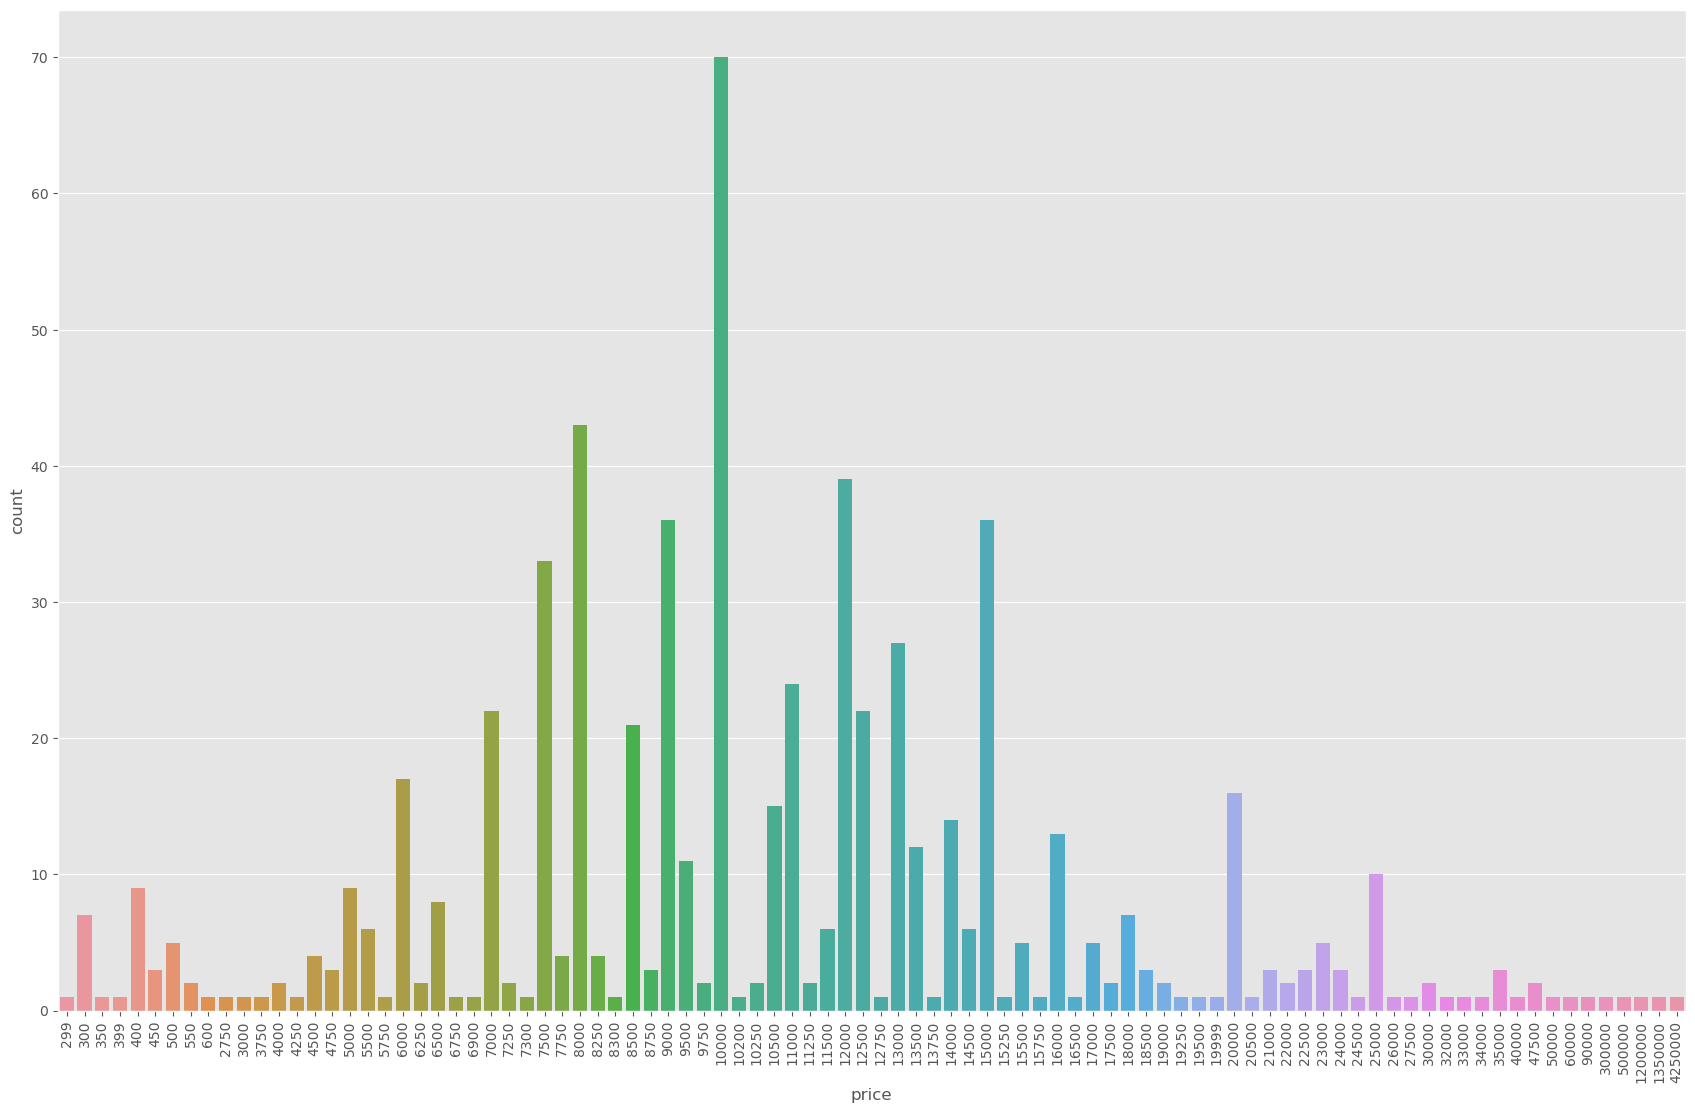

In [474]:

plt.figure(figsize = (21, 13))
plt.xticks(rotation = 90)
sns.countplot(x = df["price"]);

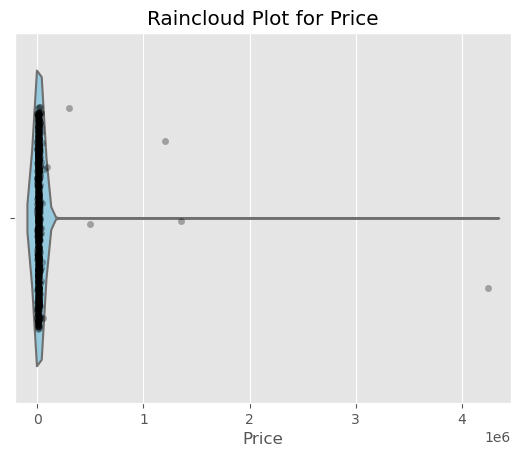

In [475]:
sns.violinplot(x=df['price'], color="skyblue", inner=None)
sns.stripplot(x=df['price'], color="black", alpha=0.3, jitter=0.3)

plt.title('Raincloud Plot for Price')
plt.xlabel('Price');


In [476]:
df = df[df["price"] < 300000]
df = df[df["price"] > 2000]

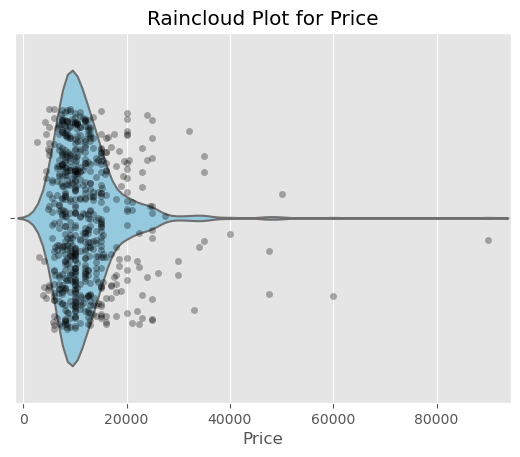

In [477]:
sns.violinplot(x=df['price'], color="skyblue", inner=None)
sns.stripplot(x=df['price'], color="black", alpha=0.3, jitter=0.3)

plt.title('Raincloud Plot for Price')
plt.xlabel('Price');

In [478]:
df["net_m2"] = df["net_m2"].str.replace("M2", "", regex=True).astype("int")

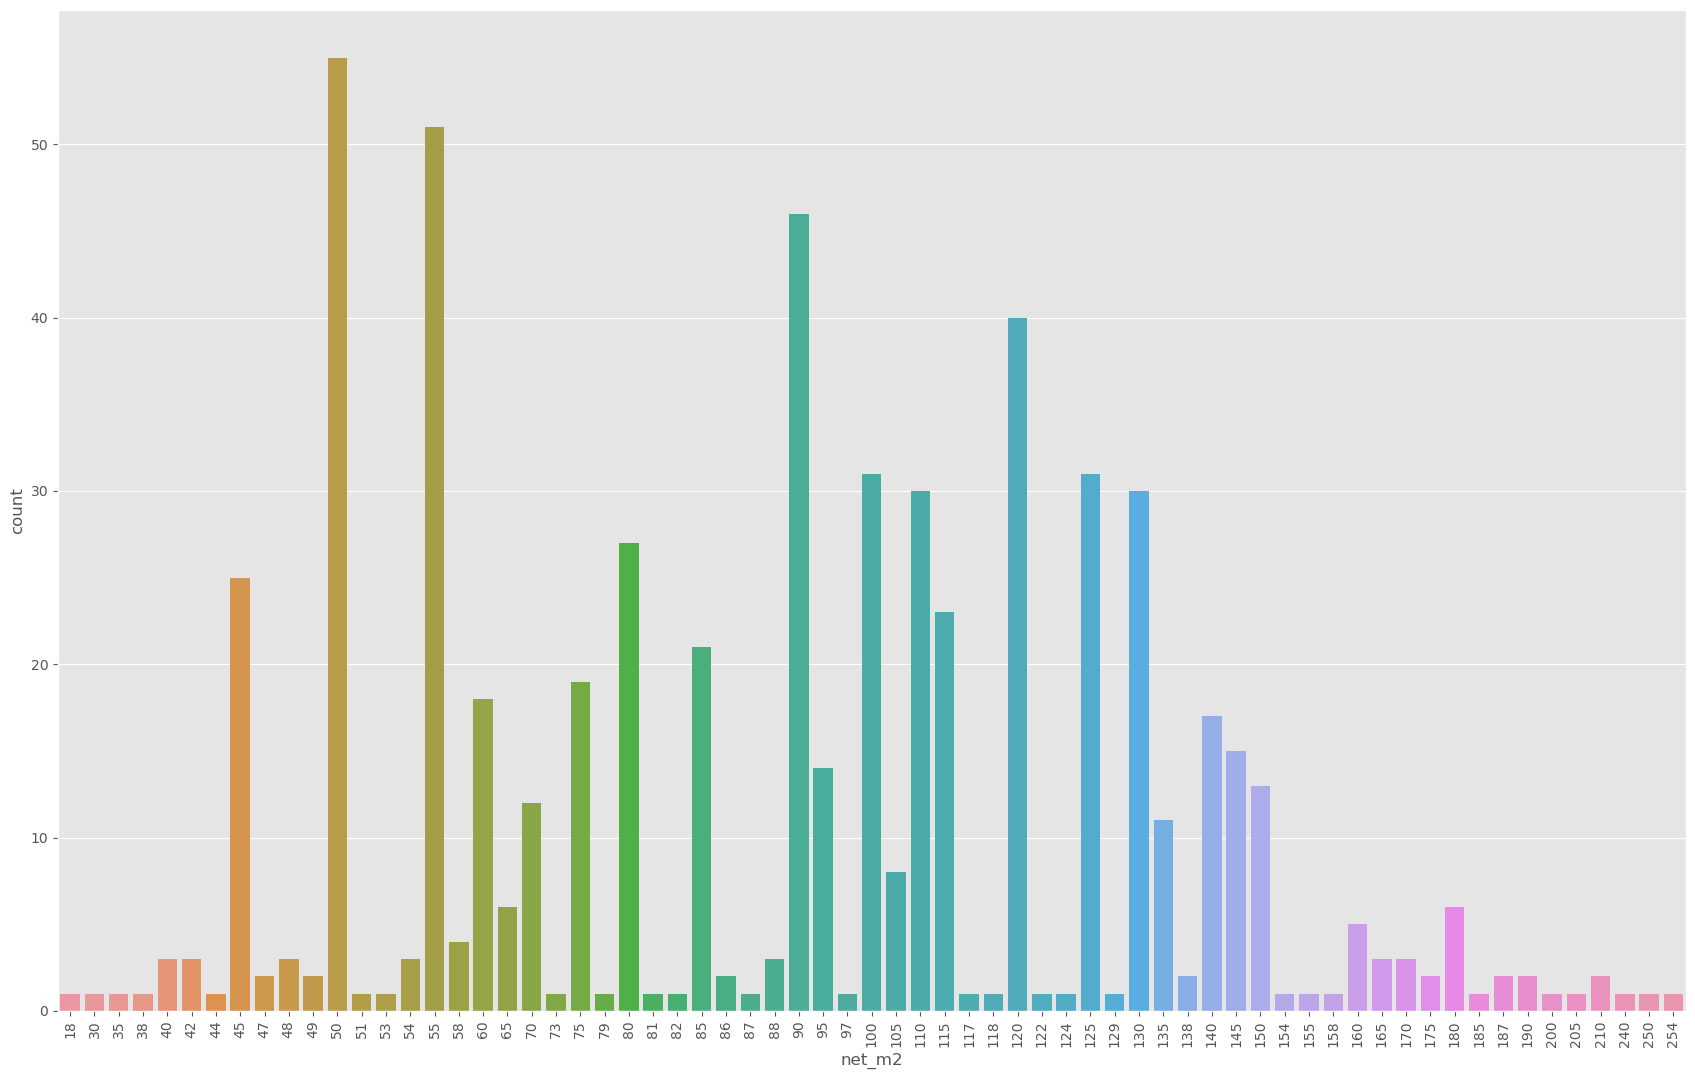

In [479]:
plt.figure(figsize = (21, 13))
plt.xticks(rotation = 90)
sns.countplot(x = df["net_m2"]);

In [480]:
df['room_count'] = df['room_count'].str.extract('(\d+(\.\d+)?)')[0].astype(float)


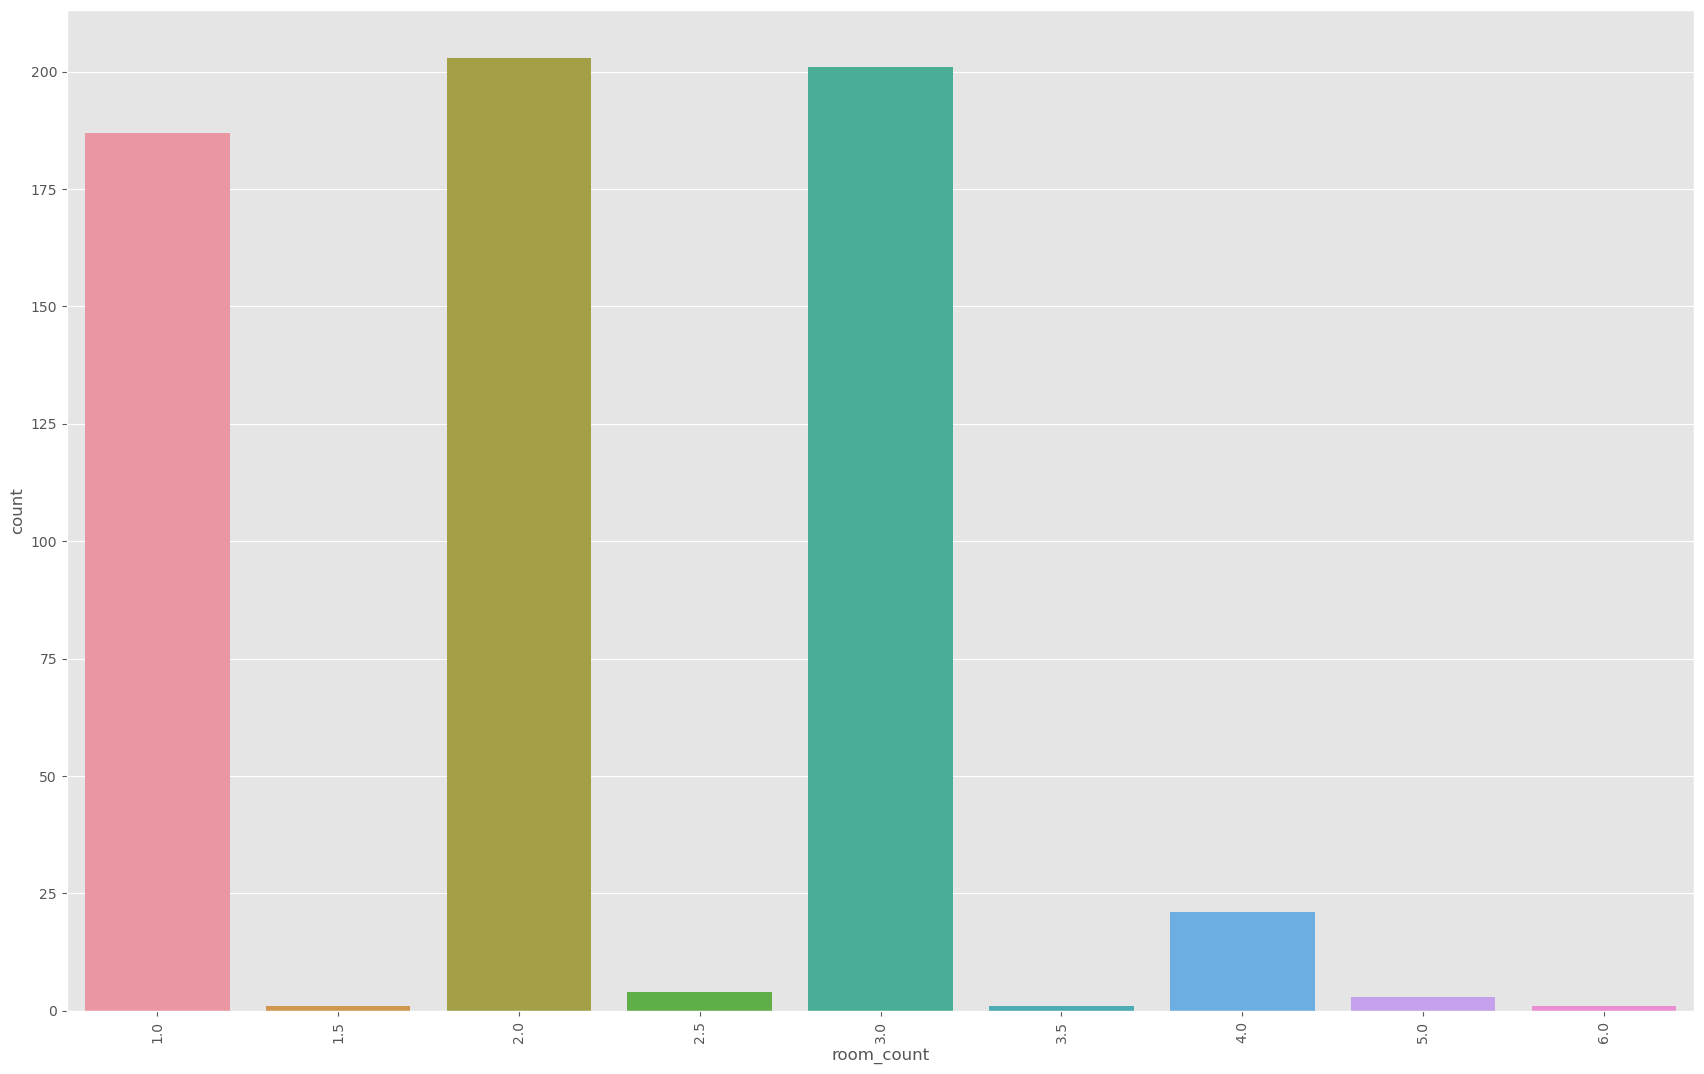

In [481]:
plt.figure(figsize = (21, 13))
plt.xticks(rotation = 90)
sns.countplot(x = df["room_count"]);

In [482]:

df['total_floor'] = pd.to_numeric(df['total_floor'].astype(str).str.extract(r"(\d+)")[0], errors='coerce').astype('Int64')

In [483]:
df['total_floor'].fillna(5, inplace = True)

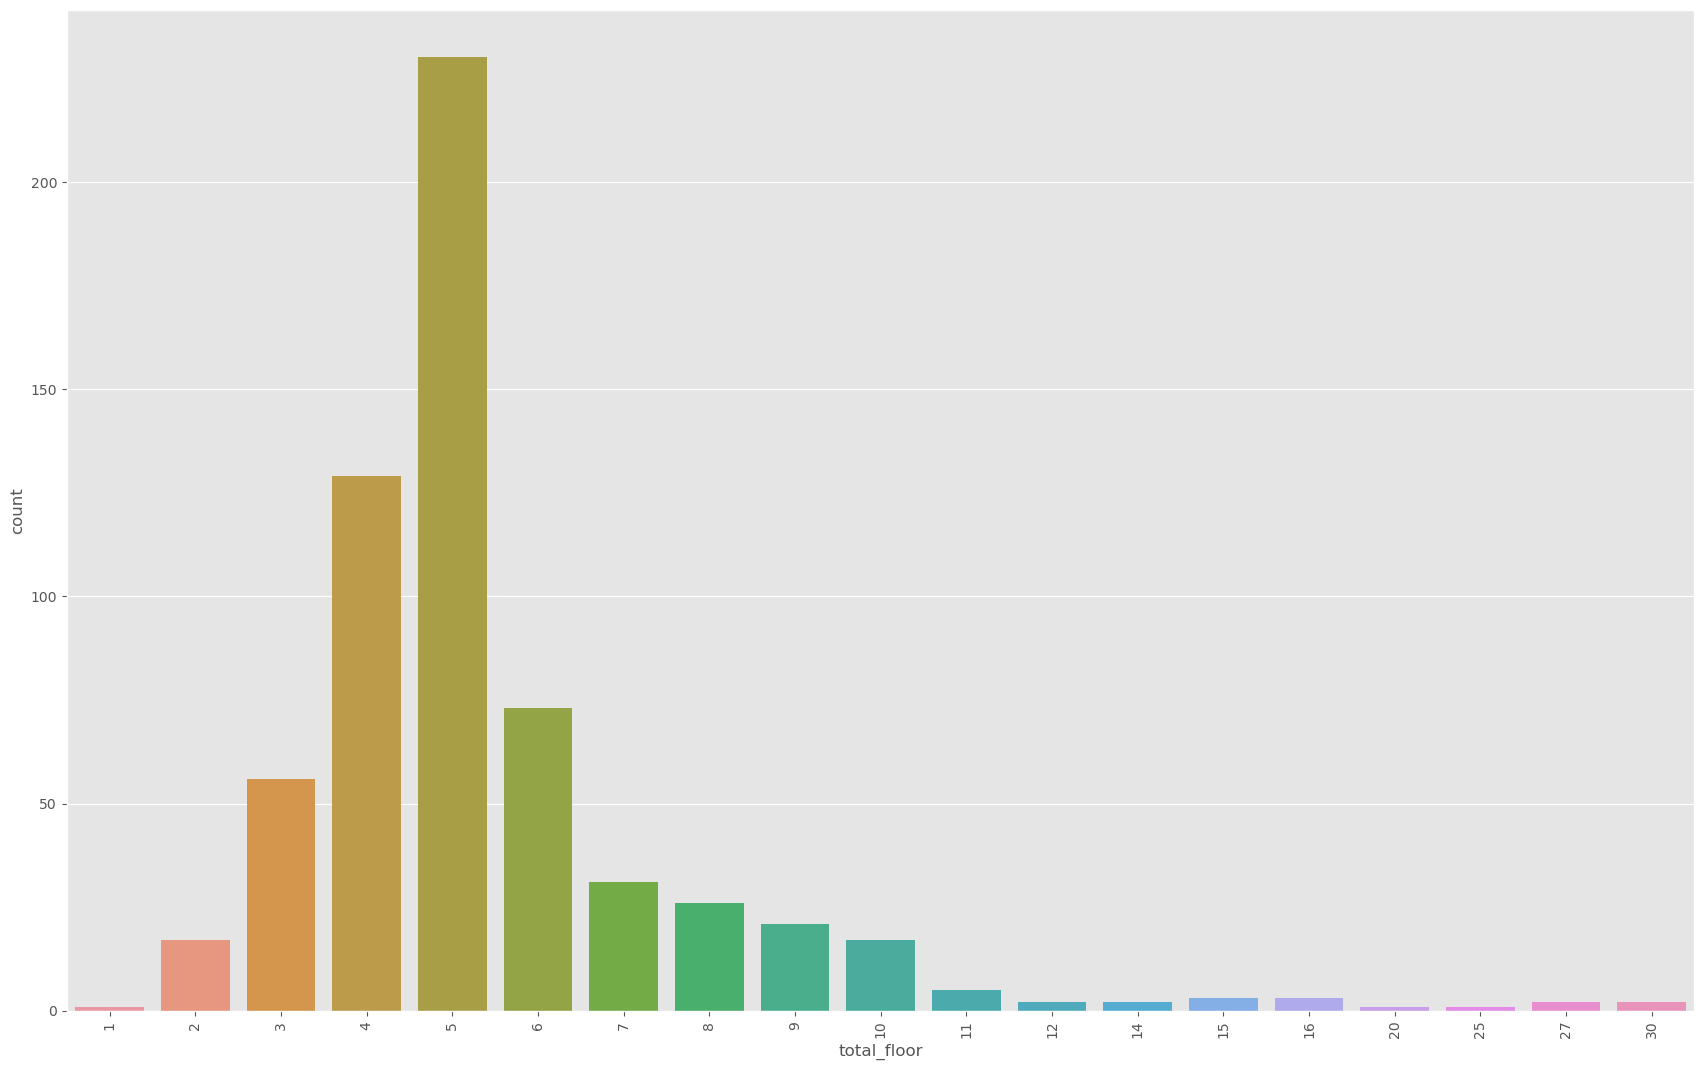

In [484]:
plt.figure(figsize = (21, 13))
plt.xticks(rotation = 90)
sns.countplot(x = df["total_floor"]);

In [485]:
df["floor"] = df["floor"].str.replace(".Kat", "", regex=True)

In [486]:
floor_replacements = {
    "Düz Giriş (Zemin)": 0,
    "Yüksek Giriş": 1,
    "Bahçeı": 0,
    "Kot 3 (-3)": -3,
    "Kot 1 (-1)": -1,
    "Kot 2 (-2)": -2,
    "Müstakil": 0
}

# Replace the values in the 'floor' column using the replacement dictionary
df['floor'] = df['floor'].replace(floor_replacements)

In [487]:
df["floor"] = df.apply(lambda x: x["total_floor"] if  x["floor"] == "Çatıı" else x["floor"], axis=1)

In [488]:
df["floor"] = df["floor"].astype(int)

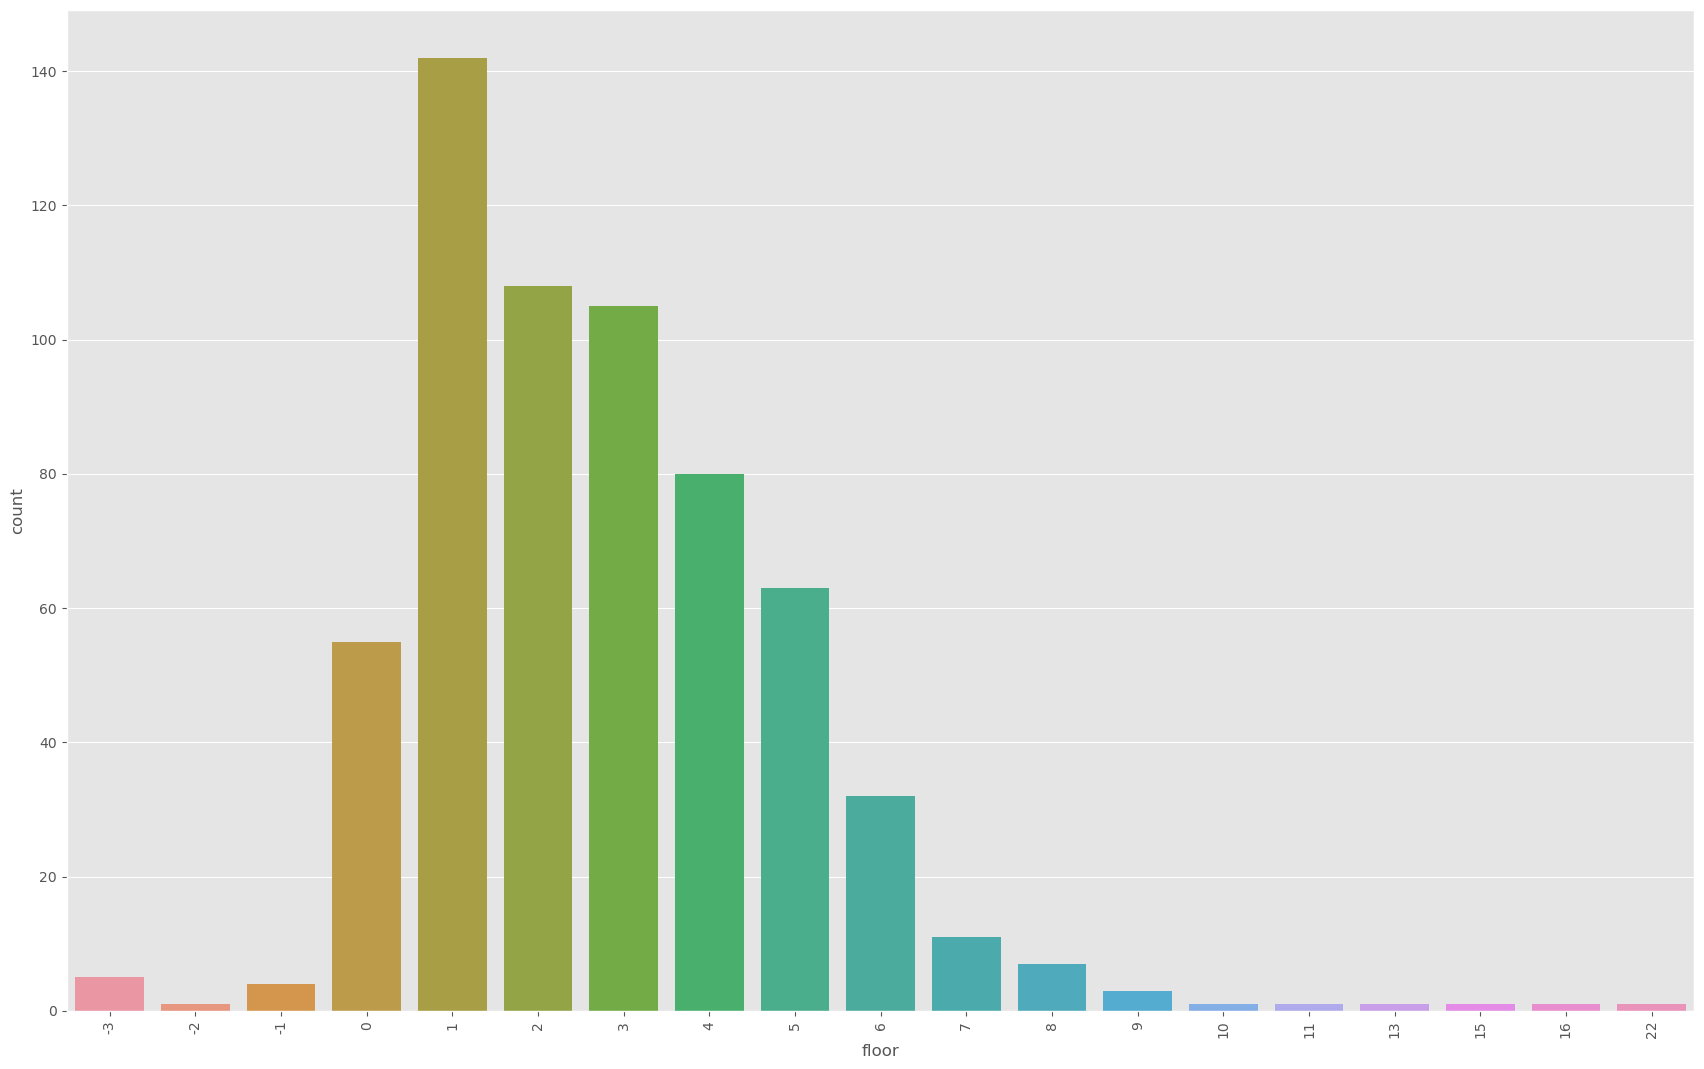

In [489]:
plt.figure(figsize = (21, 13))
plt.xticks(rotation = 90)
sns.countplot(x = df["floor"]);

In [490]:
heat = {"Kombi Doğalgaz":"Doğalgaz",
        "Yerden Isıtma":"Doğalgaz",
        "Merkezi Doğalgaz":"Doğalgaz",
        "Merkezi (Pay Ölçer)":"Doğalgaz",
        "Doğalgaz Sobalı":"Doğalgaz",
        "Boş":"Sobalı",
        "Kombi Fueloil":"Fueloil",
        "Mülk Sahibi Oturuyor":"Doğalgaz",
        "Isıtma Yok":"Sobalı",}
df["heating"] = df["heating"].replace(heat)

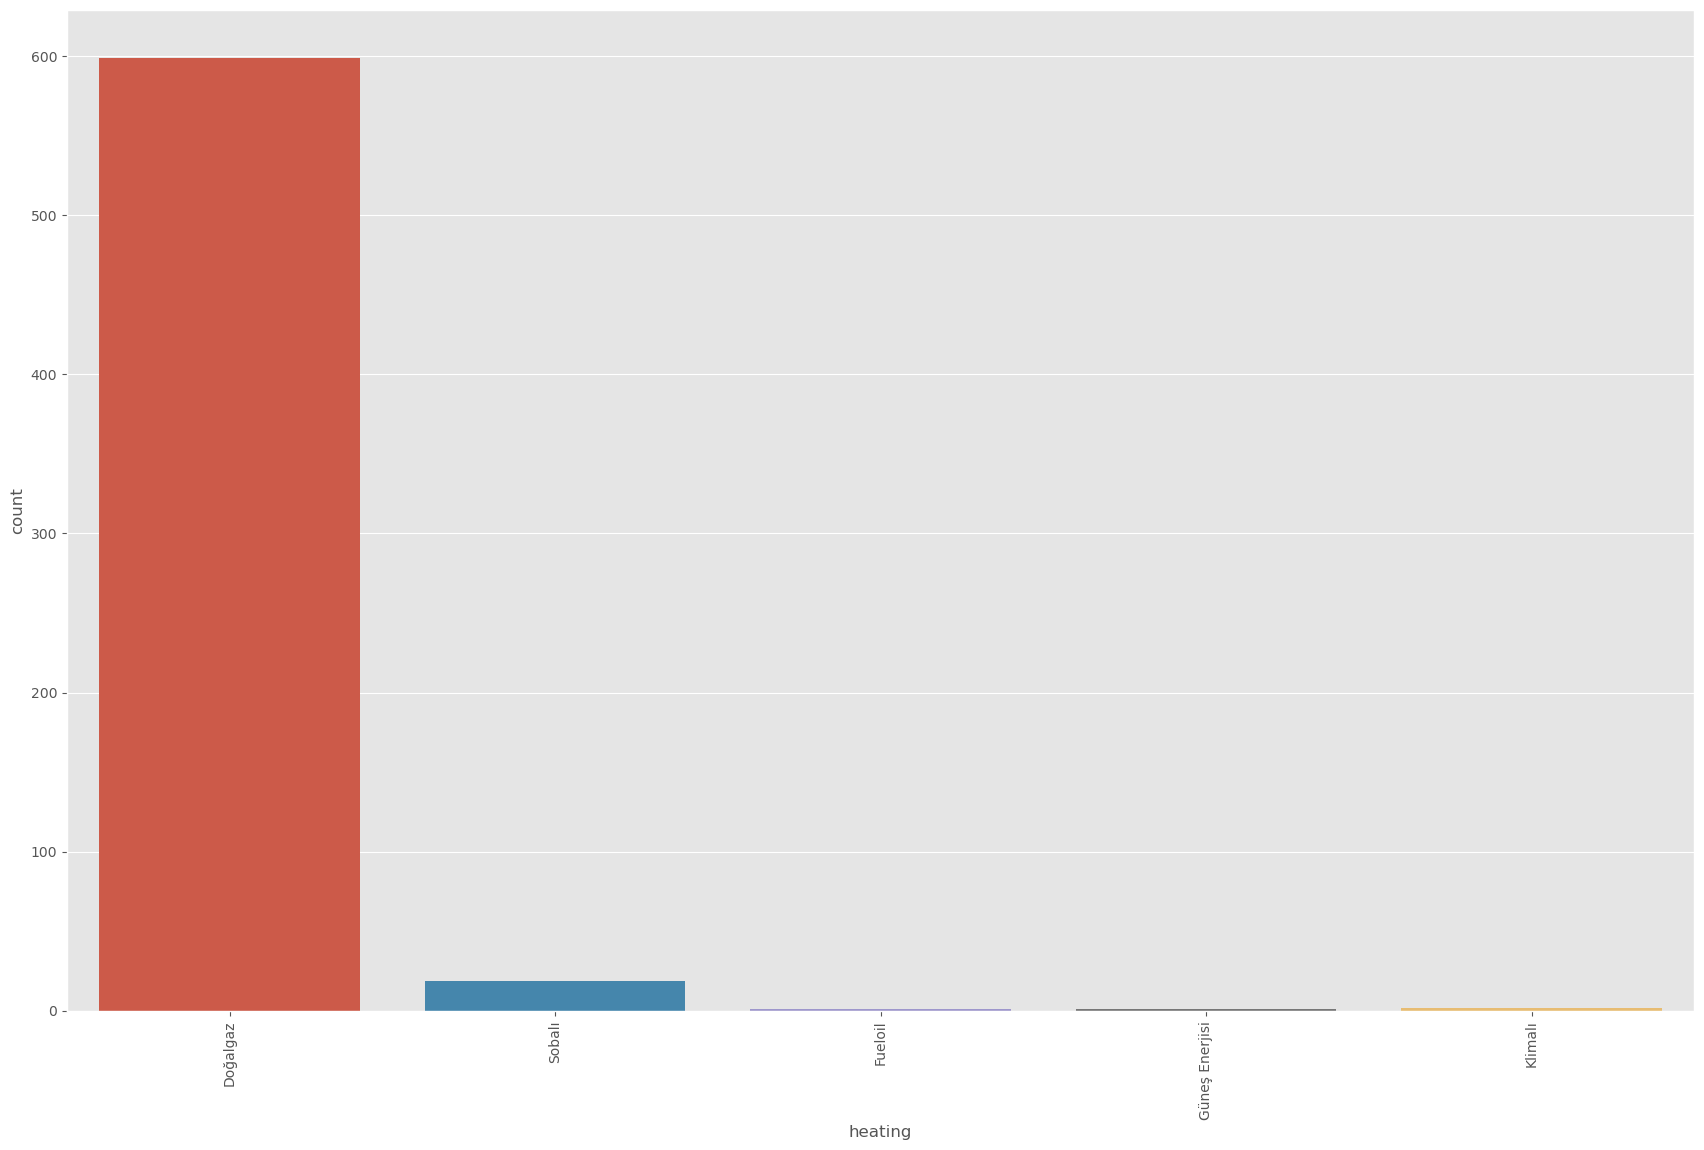

In [491]:
plt.figure(figsize = (21, 13))
plt.xticks(rotation = 90)
sns.countplot(x = df["heating"]);

In [492]:
df["property_type"].fillna("Boş", inplace = True)

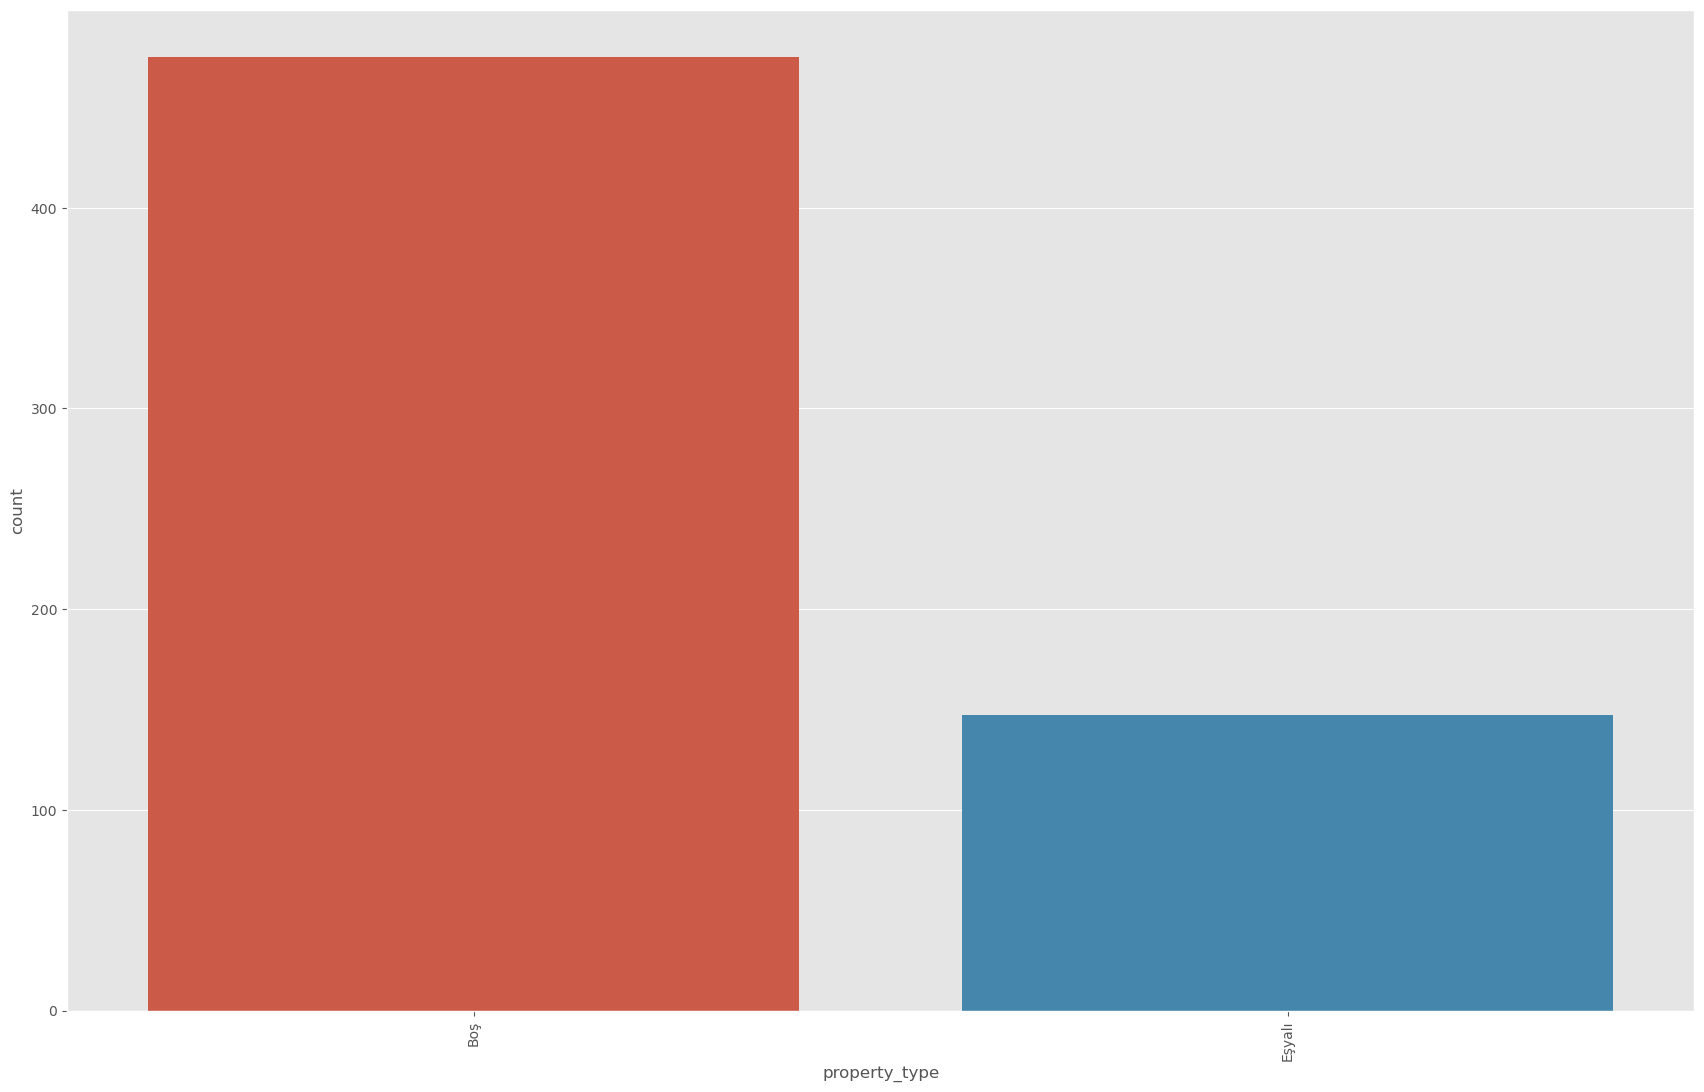

In [493]:
plt.figure(figsize = (21, 13))
plt.xticks(rotation = 90)
sns.countplot(x = df["property_type"]);

In [494]:
df["brut_m2"] = df["brut_m2"].replace("M2", "", regex=True).astype("int")

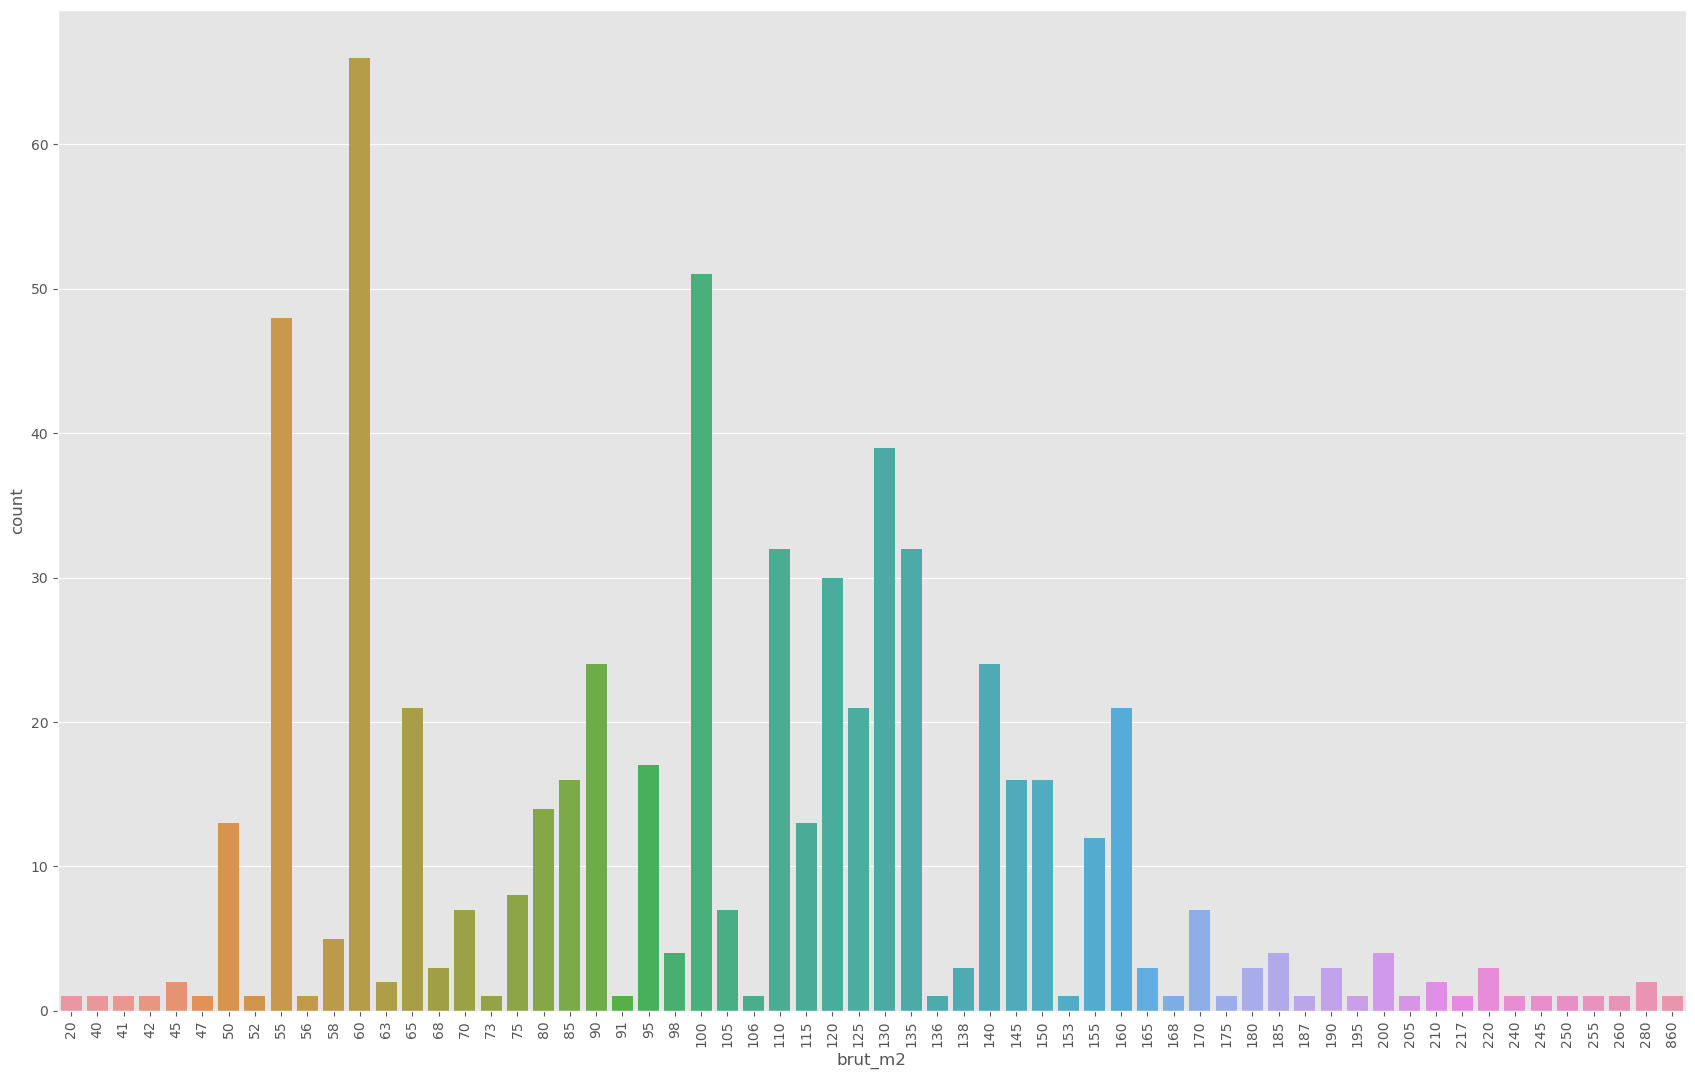

In [495]:
plt.figure(figsize = (21, 13))
plt.xticks(rotation = 90)
sns.countplot(x = df["brut_m2"]);

In [496]:
 df["age"] =  df["age"].replace({"4":"1-4",
                                 "3":"1-4",
                                 "2":"1-4",
                                 "1":"1-4"})

In [497]:
df["age"].value_counts()

age
21 Ve Üzeri    172
1-4            114
5-10           106
0 (Yeni)       106
16-20           70
11-15           54
Name: count, dtype: int64

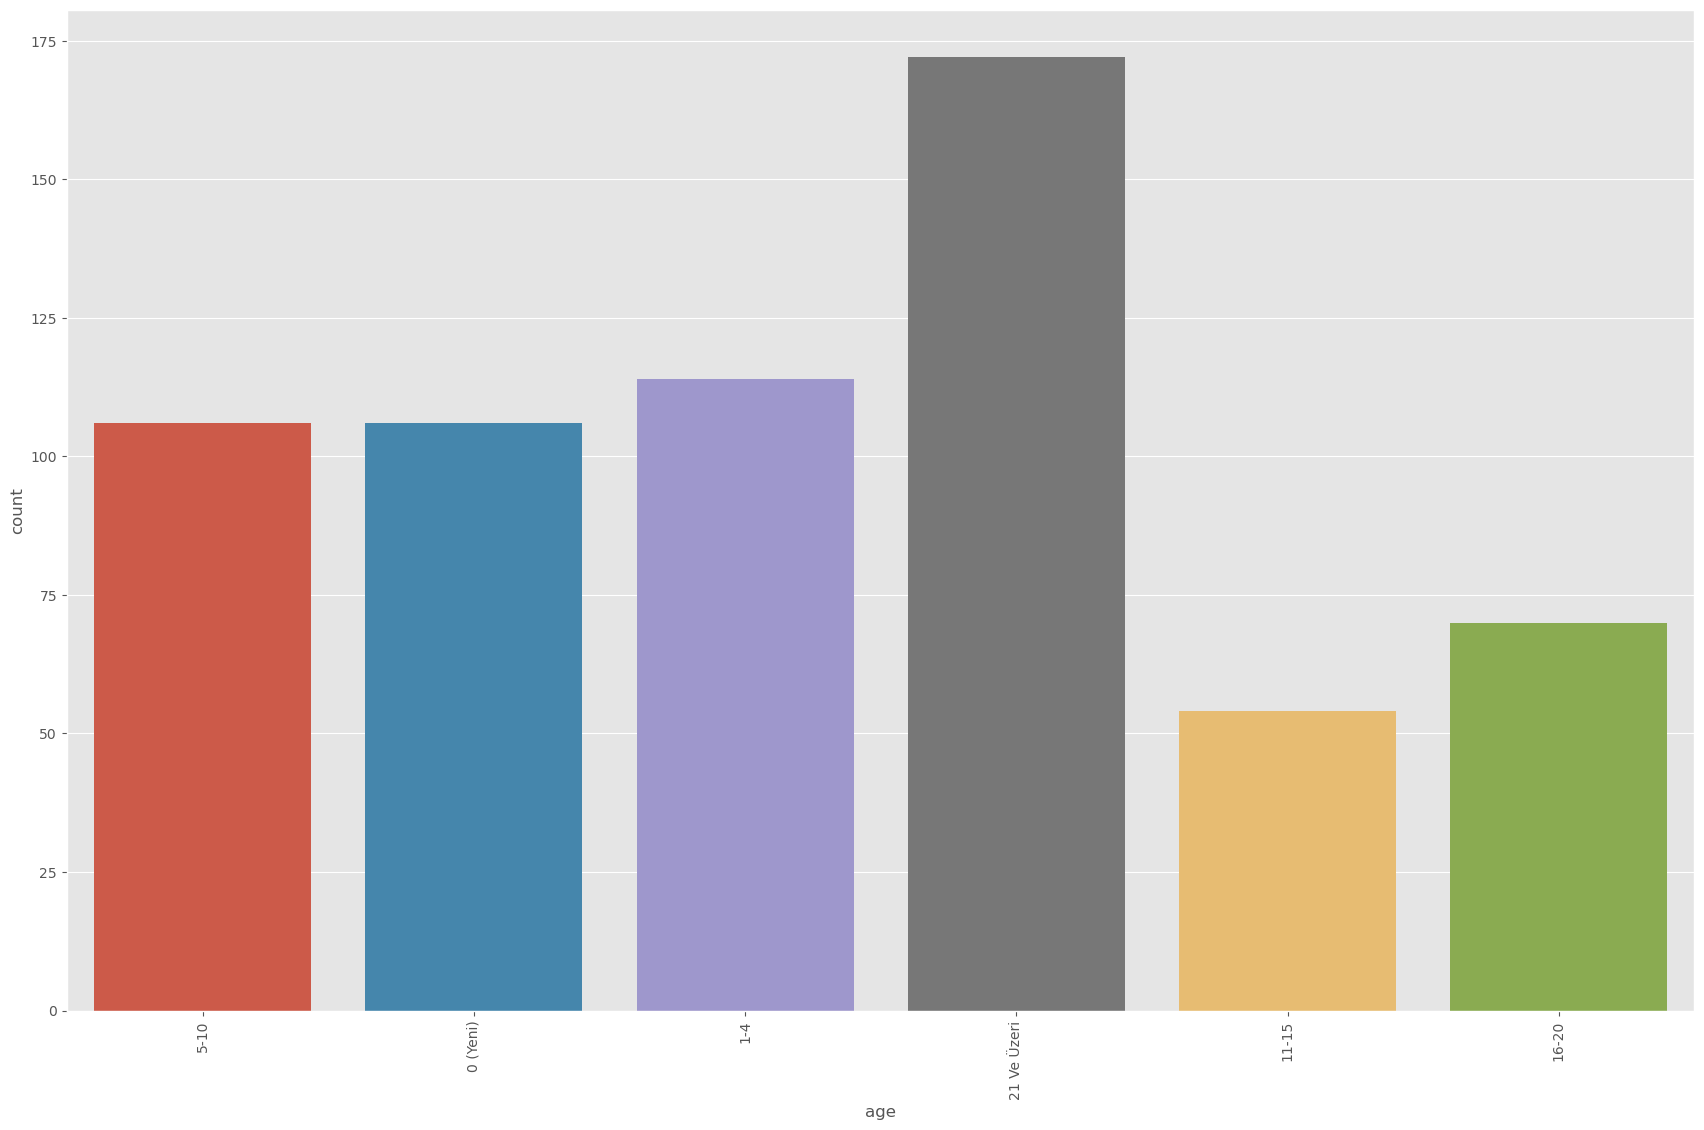

In [498]:
plt.figure(figsize = (21, 13))
plt.xticks(rotation = 90)
sns.countplot(x = df["age"]);

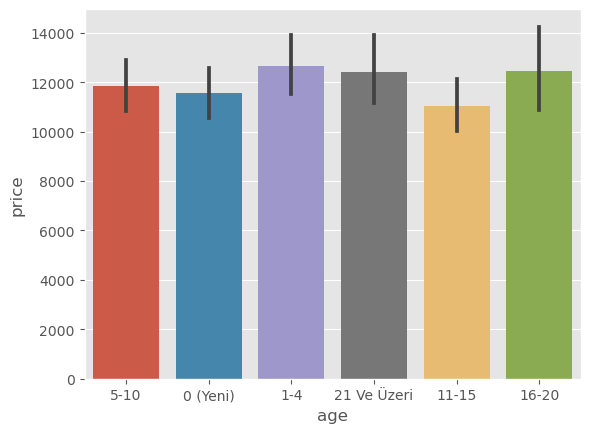

In [499]:
sns.barplot(x = df["age"], y = df["price"]);

In [500]:
df["age_new"] = df["age"].replace({"21 Ve Üzeri":1,
                                   "16-20":2,
                                   "11-15":3,
                                   "5-10":4,
                                   "1-4":5,
                                   "0 (Yeni)":6})

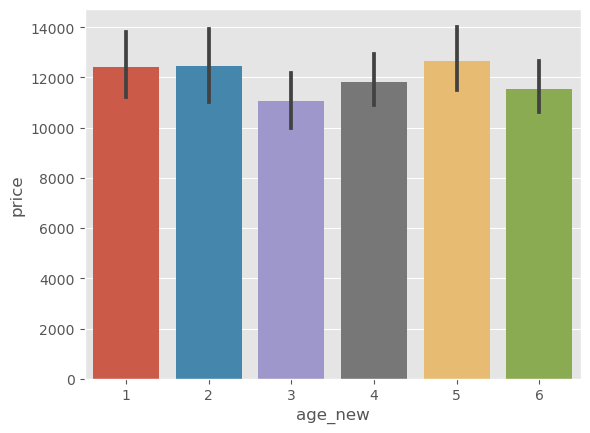

In [501]:
sns.barplot(x = df["age_new"], y = df["price"]);

In [502]:
df["due_monthly"].info()

<class 'pandas.core.series.Series'>
Index: 622 entries, 0 to 656
Series name: due_monthly
Non-Null Count  Dtype 
--------------  ----- 
115 non-null    object
dtypes: object(1)
memory usage: 9.7+ KB


In [503]:
df["balcony_count"].info()

<class 'pandas.core.series.Series'>
Index: 622 entries, 0 to 656
Series name: balcony_count
Non-Null Count  Dtype 
--------------  ----- 
112 non-null    object
dtypes: object(1)
memory usage: 9.7+ KB


In [504]:
df["living_room_m2"].info()

<class 'pandas.core.series.Series'>
Index: 622 entries, 0 to 656
Series name: living_room_m2
Non-Null Count  Dtype 
--------------  ----- 
11 non-null     object
dtypes: object(1)
memory usage: 9.7+ KB


In [505]:
df.drop(["due_monthly", "balcony_count", "living_room_m2","title"], axis = 1, inplace = True)

In [506]:
df["in_site"].replace({"Evet": 1, "Hayır": 0}, inplace = True)
df["in_site"] = df["in_site"].astype(int)

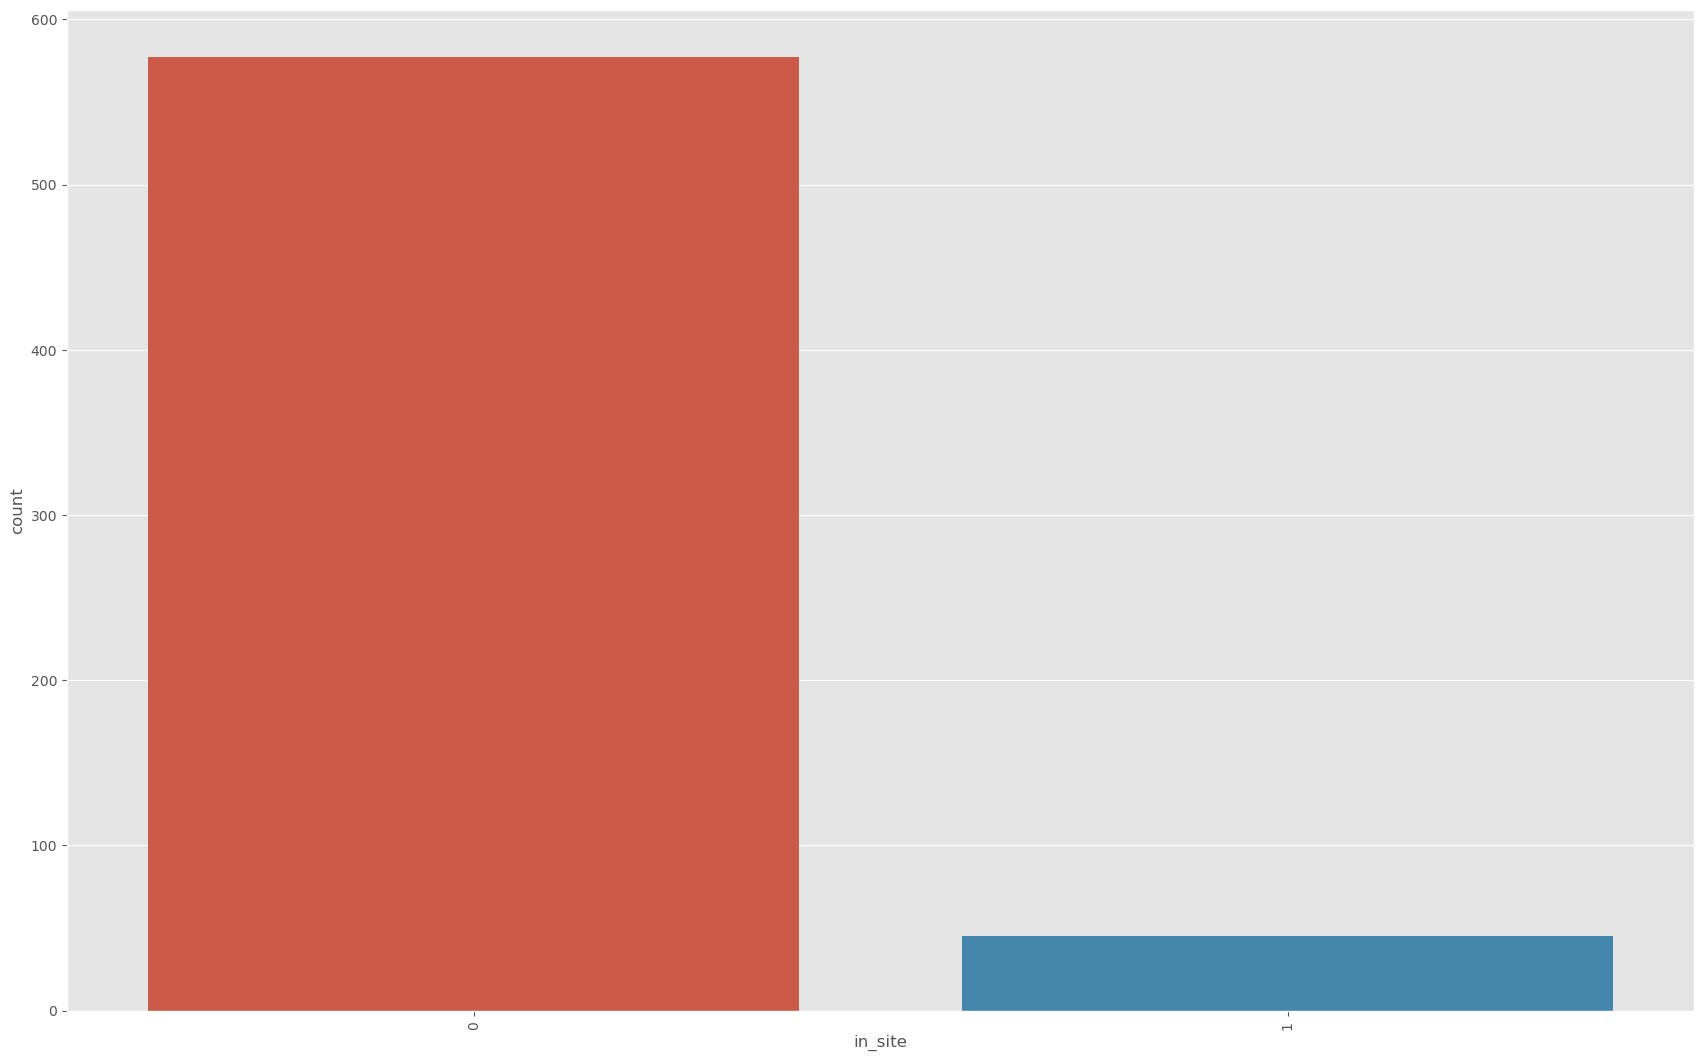

In [507]:
plt.figure(figsize = (21, 13))
plt.xticks(rotation = 90)
sns.countplot(x = df["in_site"]);

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 0 to 656
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          622 non-null    int32  
 1   net_m2         622 non-null    int32  
 2   room_count     622 non-null    float64
 3   total_floor    622 non-null    Int64  
 4   floor          622 non-null    int32  
 5   heating        622 non-null    object 
 6   property_type  622 non-null    object 
 7   brut_m2        622 non-null    int32  
 8   age            622 non-null    object 
 9   in_site        622 non-null    int32  
 10  age_new        622 non-null    int64  
dtypes: Int64(1), float64(1), int32(5), int64(1), object(3)
memory usage: 46.8+ KB


In [509]:
abs(df.corr(numeric_only=True)["price"].sort_values(ascending = False))

price          1.000000
total_floor    0.001559
room_count     0.001671
net_m2         0.010162
brut_m2        0.022920
age_new        0.026075
in_site        0.033098
floor          0.052036
Name: price, dtype: float64

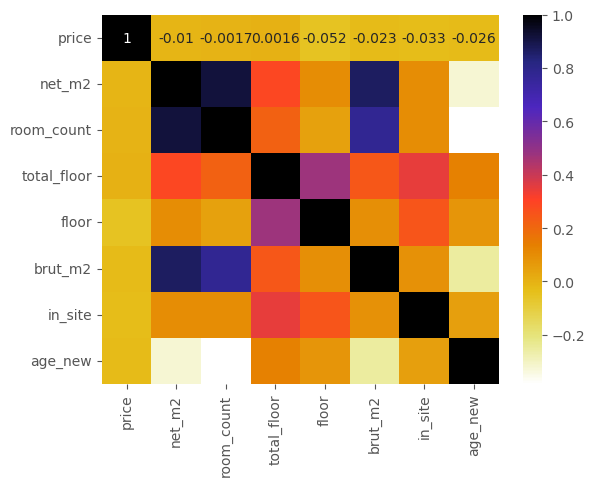

In [510]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=plt.cm.CMRmap_r);

In [511]:
df["price_per_m2"] = df["price"] / df["brut_m2"]

## Preprocessing

In [512]:
X = df.drop("price", axis = 1)
y = df["price"]

In [513]:
X = pd.get_dummies(X, drop_first = True)

In [514]:

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [515]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [516]:
def algo_test(X,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        #kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','Decision Tree','XGBRegressor']
        
        X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(X_train,y_train).predict(X_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable
    
algo_test(X,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.949574,1697.602890,693.141307
XGBRegressor,0.938513,1874.565899,814.731301
Decision Tree,0.794693,3425.390490,1164.408000
Extra Tree,0.706649,4094.508518,1542.400000
Ridge,0.655665,4436.072662,2315.700875
Lasso,0.653876,4447.584205,2318.587237
Linear,0.653675,4448.877207,2319.407306
ElasticNet,0.647654,4487.382295,2674.735746


In [517]:
xgb=XGBRegressor()
model_xgb = xgb.fit(X_train,y_train)
prediction = model_xgb.predict(X_test)
print(f"RMSE...: {np.sqrt(mean_squared_error(prediction, y_test))}\nR2 SCORE...: {r2_score(prediction, y_test)}")

RMSE...: 1874.565899084889
R2 SCORE...: 0.9390176357240927


## Feature importance

In [526]:
importances = model_xgb.feature_importances_

In [519]:
df1 = pd.get_dummies(df, drop_first = True)
df1 = df1.drop("price", axis = 1)

In [527]:
df_importances = pd.DataFrame({"Feature":df1.columns, 
                               "Importance":importances})
df_importances = df_importances.sort_values("Importance", ascending = False)
df_importances

,Feature,Importance
7,price_per_m2,0.526189
0,net_m2,0.274122
4,brut_m2,0.160333
6,age_new,0.021508
1,room_count,0.007905
2,total_floor,0.002924
17,age_5-10,0.001784
12,property_type_Eşyalı,0.001523
13,age_1-4,0.001284
3,floor,0.000778


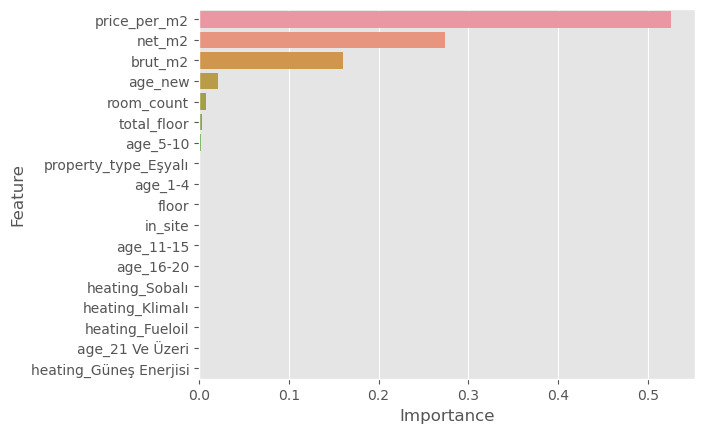

In [528]:
sns.barplot(x = df_importances.Importance, y = df_importances.Feature);

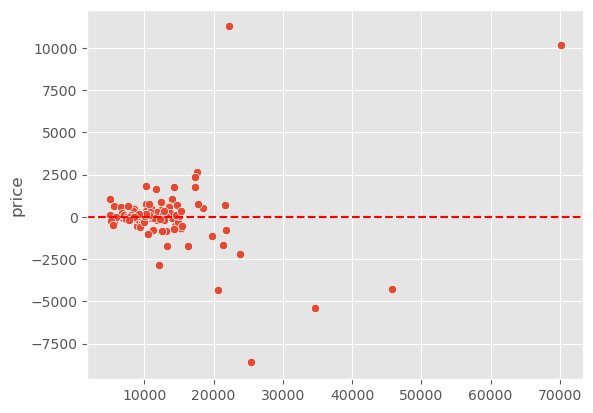

In [529]:
residuals = prediction - y_test
sns.scatterplot(x = prediction, y = residuals)
plt.axhline(y = 0, color = "r", ls = "--");

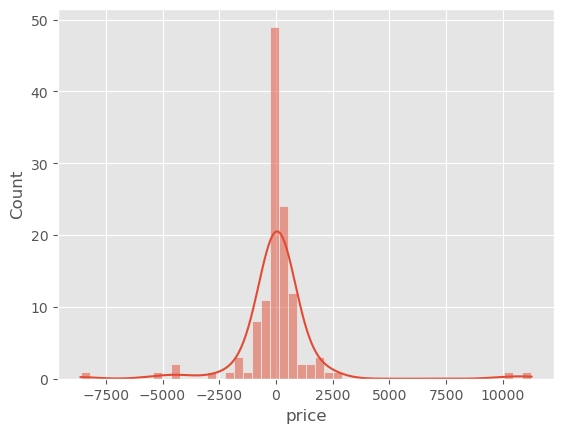

In [530]:
sns.histplot(residuals, kde = True, bins=50);

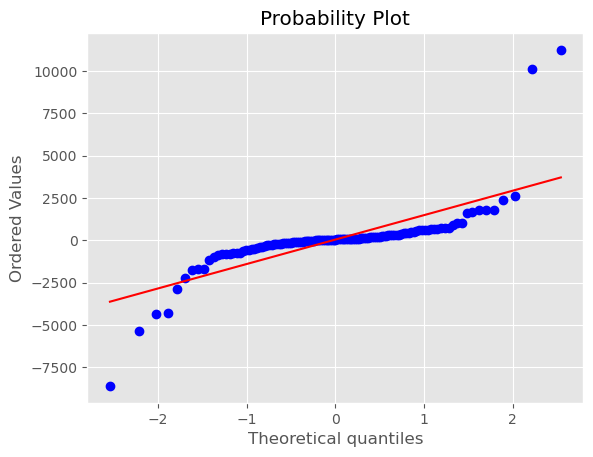

In [524]:
from scipy import stats
stats.probplot(residuals, plot = plt);


In [531]:
sh = stats.shapiro(residuals)
# Round the statistic and p-value
statistic_rounded = round(sh.statistic, 4)
pvalue_rounded = round(sh.pvalue, 4)

# Print the results in a more understandable format
print(f"Shapiro-Wilk Test Statistic: {statistic_rounded}")
print(f"Shapiro-Wilk Test p-value: {pvalue_rounded}")

Shapiro-Wilk Test Statistic: 0.5988
Shapiro-Wilk Test p-value: 0.0


In [532]:
from joblib import dump
dump(model_xgb, 'model_xgb.joblib')

['model_xgb.joblib']

## DEEP LEARNING

In [551]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [615]:
model = Sequential()

model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))

model.add(Dense(1, activation = "relu"))

model.compile(loss="mse", optimizer="adam")

In [616]:
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    validation_data=(X_test, y_test),
                    batch_size=32
                    )

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 209550272.0000 - val_loss: 205874544.0000
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 170176928.0000 - val_loss: 188077360.0000
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 141839056.0000 - val_loss: 47748260.0000
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 72177528.0000 - val_loss: 48483548.0000
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34764076.0000 - val_loss: 33478824.0000
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29878772.0000 - val_loss: 26646304.0000
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21916388.0000 - val_loss: 22845296.0000
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18700496.0000 - val_loss: 21754212.0000
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14103420.0000 - val_loss: 20599966.0000
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10340853.0000 - val_loss: 22310348.0000
Epo

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 475717.5000 - val_loss: 11375695.0000
Epoch 63/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 430868.7812 - val_loss: 10473366.0000
Epoch 64/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 328036.9375 - val_loss: 9893948.0000
Epoch 65/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 359127.5938 - val_loss: 10793662.0000
Epoch 66/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 283877.6875 - val_loss: 10005647.0000
Epoch 67/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 400135.9375 - val_loss: 10317797.0000
Epoch 68/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 426974.4688 - val_loss: 9364278.0000
Epoch 69/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 400857.5938 - val_loss: 9752096.0000
Epoch 70/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 304003.2812 - val_loss: 10147000.0000
Epoch 71/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 337212.9688 - val_loss: 9484624.0000
Epoch 72/100
16/16 ━━━━━━━━━━━━━━━━━━

In [617]:
prediction = model.predict(X_test)

print(f"RMSE...: {np.sqrt(mean_squared_error(prediction, y_test))}\nR2 SCORE...: {r2_score(prediction, y_test)}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
RMSE...: 2999.8483403426226
R2 SCORE...: 0.891911187407752


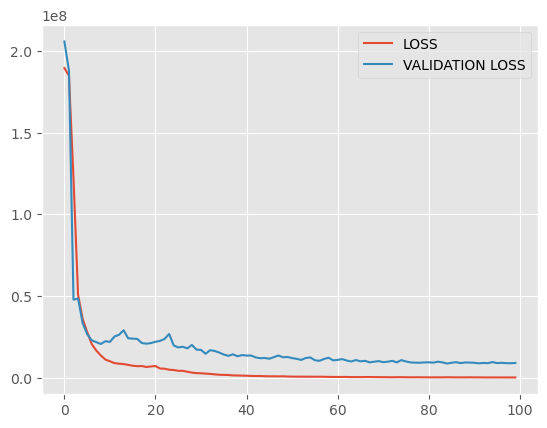

In [618]:
plt.plot(history.history["loss"], label="LOSS")
plt.plot(history.history["val_loss"], label="VALIDATION LOSS")
plt.legend();

In [620]:
model.save('model_tf.keras')

## Conclusion